In [16]:
import pandas as pd

In [18]:
import pandas as pd

df = pd.read_csv(r"C:\Users\benwa\Downloads\train.csv")

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# SQL - Query the data

In [22]:
!pip install ipython-sql

%load_ext sql

In [24]:
# Use a file-based SQLite database
database_filename = 'my_database.db'
df.to_sql('titanic_data', f'sqlite:///{database_filename}', if_exists='replace', index=False)

# Now connect ipython-sql to the same file-based database
%sql sqlite:///my_database.db

In [26]:
%sql SELECT * FROM titanic_data LIMIT 10;

 * sqlite:///my_database.db
Done.


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,None,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,None,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,None,S
6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,None,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,None,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,None,C


| Variable | Definition                              | Key                                      |
|----------|-----------------------------------------|------------------------------------------|
| survival | Survival                                | 0 = No, 1 = Yes                          |
| pclass   | Ticket class                            | 1 = 1st, 2 = 2nd, 3 = 3rd               |
| sex      | Sex                                     | N/A                                      |
| Age      | Age in years                            | N/A                                      |
| sibsp    | # of siblings / spouses aboard the Titanic | N/A                                  |
| parch    | # of parents / children aboard the Titanic | N/A                                  |
| ticket   | Ticket number                           | N/A                                      |
| fare     | Passenger fare                          | N/A                                      |
| cabin    | Cabin number                            | N/A                                      |
| embarked | Port of Embarkation                     | C = Cherbourg, Q = Queenstown, S = Southampton |refore parch=0 for them.refore parch=0 for them.

| *Variable Notes* |
|------------------|
|pclass: A proxy for socio-economic status (SES)|
|"1st = Upper"|
|"2nd = Middle"|
|"3rd = Lower"|
|age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5|
|sibsp: The dataset defines family relations in this way...|
|Sibling = brother, sister, stepbrother, stepsister|
|Spouse = husband, wife (mistresses and fiancés were ignored)|
|parch: The dataset defines family relations in this way...|
|Parent = mother, father|
|Child = daughter, son, stepdaughter, stepson|
|Some children travelled only with a nanny, therefore parch=0 for them.|

**Goal** : Analyze the correlation between passenger class and survival on the Titanic, and examine the age distribution within each class to pinpoint vulnerable age groups

**Hypotheses**:
1. First-class passengers had a significantly higher survival rate than those in lower classes.
2. Children and young adults had a higher survival rate across all classes.
3. Elderly passengers had a lower survival rate.

In [28]:

# Servived Pclass & age
%sql SELECT Survived, Pclass, Age FROM titanic_data LIMIT 10;

 * sqlite:///my_database.db
Done.


Survived,Pclass,Age
0,3,22.0
1,1,38.0
1,3,26.0
1,1,35.0
0,3,35.0
0,3,None
0,1,54.0
0,3,2.0
1,3,27.0
1,2,14.0


In [30]:
Pclass_Age = %sql SELECT Survived, Pclass, Age FROM titanic_data

 * sqlite:///my_database.db
Done.


# Python

In [32]:
df = pd.DataFrame(Pclass_Age)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


In [34]:
#Find missing values
print('Number of Missing Values:')
print(df.isnull().sum())

Number of Missing Values:
Survived      0
Pclass        0
Age         177
dtype: int64


In [36]:
df.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [38]:
# Replace the missing values in Age
#Find the mean of the Age column
age_mean = df['Age'].mean()

#Replace missing values in the Age column with the mean
df['Age'].fillna(age_mean, inplace=True)

#Verify that there are no missing values in the age column
print('Number of Missing Values in Age column:')
print(df['Age'].isnull().sum())

Number of Missing Values in Age column:
0


C:\Users\benwa\AppData\Local\Temp\ipykernel_11500\808600105.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_mean, inplace=True)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


In [42]:
# Round the values in the Age column
df ['Age'] = df['Age'].round()

In [44]:
df.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.754209
std,0.486592,0.836071,13.000828
min,0.000000,1.000000,0.000000
25%,0.000000,2.000000,22.000000
50%,0.000000,3.000000,30.000000
75%,1.000000,3.000000,35.000000
max,1.000000,3.000000,80.000000


In [46]:
#Define a function to categorize age. Source:https://www.indexmundi.com/united_states/age_structure.html#:~:text=Information%20is%20included%20by%20sex,years%20and%20over%20(elderly).
def categorize_age(age):
    if age <= 14:
        return 'Children'
    elif 15 <= age <= 64:
        return 'Youth&Adults'
    else:
        return 'Seniors'
#Create the 'age_category' column
df['age_category'] = df['Age'].apply(categorize_age)

In [48]:
df.head(10)

,Survived,Pclass,Age,age_category
0,0,3,22.0,Youth&Adults
1,1,1,38.0,Youth&Adults
2,1,3,26.0,Youth&Adults
3,1,1,35.0,Youth&Adults
4,0,3,35.0,Youth&Adults
5,0,3,30.0,Youth&Adults
6,0,1,54.0,Youth&Adults
7,0,3,2.0,Children
8,1,3,27.0,Youth&Adults
9,1,2,14.0,Children


In [50]:
#Checking the age_category
print(df['age_category'].value_counts())

age_category
Youth&Adults    802
Children         78
Seniors          11
Name: count, dtype: int64


In [123]:
df.to_excel('titanic_project.xlsx', index=False)

print('\nData has been exported to titanic_project.xlsx')


Data has been exported to titanic_project.xlsx


# Tableau Dashboard

In [128]:
from IPython.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1723330494748' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt='Dashboard 1 ' src='https://public.tableau.com/static/images/Ti/TitanicsSurvivalRate/Dashboard1/1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz'  style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
        <param name='embed_code_version' value='3' />
        <param name='site_root' value='' />
        <param name='name' value='TitanicsSurvivalRate&#47;Dashboard1' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https://public.tableau.com/static/images/Ti/TitanicsSurvivalRate/Dashboard1/1.png' />
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
    </object>
</div>
<script type='text/javascript'>
    var divElement = document.getElementById('viz1723330494748');
    var vizElement = divElement.getElementsByTagName('object')[0];
    if (divElement.offsetWidth > 800) {
        vizElement.style.width='1024px';
        vizElement.style.height='795px';
    } else if (divElement.offsetWidth > 500) {
        vizElement.style.width='1024px';
        vizElement.style.height='795px';
    } else {
        vizElement.style.width='100%';
        vizElement.style.height='1477px';
    }
    var scriptElement = document.createElement('script');
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
    vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>
""")

https://public.tableau.com/views/TitanicsSurvivalRate/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

In [12]:
import scipy.stats

In [52]:
x = df['Pclass']
y = df['Survived']

r_value, p_value = scipy.stats.pearsonr(x, y)

print("Pearson correlation coefficient (r_value):", r_value)
print("P-value:", p_value)

Pearson correlation coefficient (r_value): -0.3384810359610153
P-value: 2.537047387981485e-25


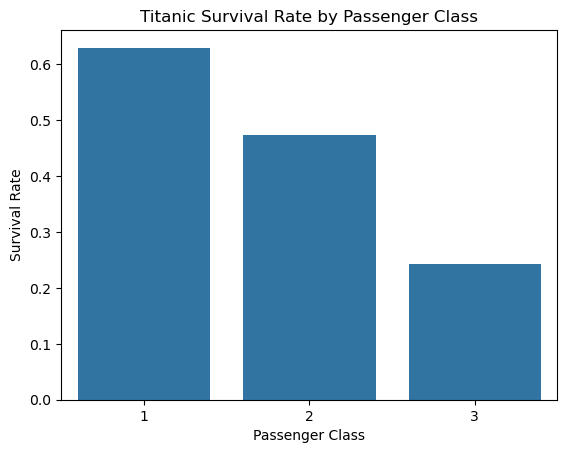

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate survival rates per class
survival_rates = df.groupby('Pclass')['Survived'].mean()

# Create the bar chart
sns.barplot(x=survival_rates.index, y=survival_rates.values)

# Add labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Titanic Survival Rate by Passenger Class")

# Show the plot
plt.show()

# Titanic Survival - The Impact of Class and Age

My analysis of the Titanic data confirms that both passenger class and age played a major role in determining who survived this tragic event.

**Class and Survival**

The data shows a moderate negative correlation between passenger class and survival. The negative r-value of -0.34 indicate that as Pclass increases the likelihood of surival tends to decrease. First-class passengers had a higher likelihood of surviving compared to those in second and third class.

With the extremly small p_value of 2.54 indicates that the observed correlation is highly statistically significant. It's very unlikely that this correlation occurred by chance.

**Age and Survival**

Age was another critical factor. Children, especially those in second class, had the highest survival rates. This aligns with the "women and children first" policy implemented during the disaster. Sadly, elderly passengers, particularly those in second and third class, were the most vulnerable, with very low survival rates. The survival of one elderly passenger in first class raises questions about individual circumstances and potential exceptions to the general trends.

**Key Takeaways**

- Socioeconomic status, as reflected in passenger class, significantly impacted survival chances.
- Children were prioritized during evacuation, leading to higher survival rates.
- Elderly passengers, especially those in lower classes, were particularly vulnerable.

**Further Considerations**

- A more in-depth statistical analysis is needed to confirm whether the observed survival rate among elderly passengers is statistically significant or merely due to chance.
- Additional factors, such as gender and family size, could also influence survival rates and warrant further investigation.